<a href="https://colab.research.google.com/github/Vbarnabas/activelearning_geneexpression/blob/main/temalab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dream4 adat beolvasása

In [ ]:
%%capture
!pip install pomegranate==0.14.9
!apt-get install -y graphviz-dev
!pip install pygraphviz
!pip install networkx


In [ ]:
!git clone https://github.com/xunzheng/notears
!pip install igraph

import sys
sys.path.append('/content/notears')
from notears import linear, utils
import numpy as np

import pandas as pd
import numpy as np

from pomegranate import BayesianNetwork
from pomegranate import DiscreteDistribution, ConditionalProbabilityTable

PATH_ON_GOOGLE_DRIVE = "/Dream4/DREAM4_InSilico_Size10/insilico_size10_1/"

from google.colab import drive

BASE_PATH = "/content/drive"
drive.mount(BASE_PATH)
BASE_PATH = "/content/drive/My Drive"

#assert utils.is_dag(W_notears)

fatal: destination path 'notears' already exists and is not an empty directory.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

import matplotlib as mpl
# Just so the generated figures won't look too ugly
mpl.rcParams['figure.figsize'] = [3, 2]
mpl.rcParams['figure.dpi'] = 200

from matplotlib import pyplot as plt



import networkx as nx
import pomegranate as pg; print('pg: ' + pg.__version__)

pg: 0.14.9


Adatok betöltése

In [ ]:
x = np.genfromtxt(BASE_PATH+PATH_ON_GOOGLE_DRIVE+"insilico_size10_1_timeseries.tsv", delimiter='\t', skip_header=True)
x=x[:,1:]
knockout_data = np.genfromtxt(BASE_PATH+PATH_ON_GOOGLE_DRIVE+"insilico_size10_1_knockout_timeseries.tsv", delimiter='\t', skip_header=True)
knockout_dict={}

knockout_data=knockout_data[:,1:]
for row in knockout_data:
    zero_index=np.where(row==0)[0]
    if zero_index.size>0:
      gene = "G"+str(zero_index[0]+1)
      if gene not in knockout_dict:
          knockout_dict[gene] = []

      knockout_dict[gene].append(row)

for gene in knockout_dict:
    knockout_dict[gene] = np.array(knockout_dict[gene])

W_notears = linear.notears_linear(x, lambda1=0, loss_type='l2')

In [ ]:

#assert utils.is_dag(W_notears)

print(x.shape)
print(W_notears)
print(W_notears.shape)
gene_data = x


(105, 10)
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.65638142  0.         -0.61959798  0.         -1.03633385  0.
  -0.40838708 -0.35100424 -0.94805997  0.37510966]
 [ 0.          0.          0.          0.55780501  0.5832472   0.
   0.34644133  0.          0.          0.43030385]
 [ 0.          0.          0.          0.         -0.52925475  0.
   0.42727354  0.          0.41481955  0.36781563]
 [-0.89402231  0.          0.          0.          0.          0.
   0.43773677  0.          0.55414067  0.        ]
 [ 0.          0.          0.         -0.47068972  0.58884731  0.
   0.         -1.45318519  0.          0.56468328]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0. 

In [ ]:
"""

gene_distributions={}
for gene in gene_data.columns:
  gene_distributions[gene]={}
  for index, row in gene_data.iterrows():
      distribution = DiscreteDistribution({1: row[gene], 0: 1-row[gene]})
      gene_distributions[gene][index] = distribution



def generate_topological_samples(sample_count: int = 1) -> np.ndarray:


  global gene_distributions
  result = pd.DataFrame()

  for i in range(sample_count):

    gene_samples={}
    for gene, distributions in gene_distributions.items():
      gene_samples[gene]= {ind: distributions[ind].sample() for ind in gene_data.index}
    result = pd.concat([result, pd.DataFrame(gene_samples)], ignore_index=True)
  return result.to_numpy()


def new_model_from_samples(samples: np.ndarray) -> BayesianNetwork:



  learned_model = BayesianNetwork.from_samples(samples, algorithm='chow-liu')

  for i in range(len(learned_model.states)):
    learned_model.states[i].name = gene_data.columns[i]
  return learned_model
  """

"\n\ngene_distributions={}\nfor gene in gene_data.columns:\n  gene_distributions[gene]={}\n  for index, row in gene_data.iterrows():\n      distribution = DiscreteDistribution({1: row[gene], 0: 1-row[gene]})\n      gene_distributions[gene][index] = distribution\n\n\n\ndef generate_topological_samples(sample_count: int = 1) -> np.ndarray:\n  \n  \n  global gene_distributions\n  result = pd.DataFrame()\n\n  for i in range(sample_count):\n\n    gene_samples={}\n    for gene, distributions in gene_distributions.items():\n      gene_samples[gene]= {ind: distributions[ind].sample() for ind in gene_data.index}\n    result = pd.concat([result, pd.DataFrame(gene_samples)], ignore_index=True)\n  return result.to_numpy()\n\n\ndef new_model_from_samples(samples: np.ndarray) -> BayesianNetwork:\n  \n\n\n  learned_model = BayesianNetwork.from_samples(samples, algorithm='chow-liu')\n\n  for i in range(len(learned_model.states)):\n    learned_model.states[i].name = gene_data.columns[i]\n  return learn

A NOTEARS által generált mátrixból DiGraph-ot készítünk


In [ ]:
def graphFromNotears(W_notears):
  graph = nx.DiGraph()
  node_count=W_notears.shape[0]
  node_names=[]

  for i in range(node_count):
    node_names.append("G"+str(i+1))
  graph.add_nodes_from(node_names)

  for i in range(node_count):
      for j in range(node_count):
          if W_notears[i, j] != 0:
              graph.add_edge(node_names[i], node_names[j])
  return graph


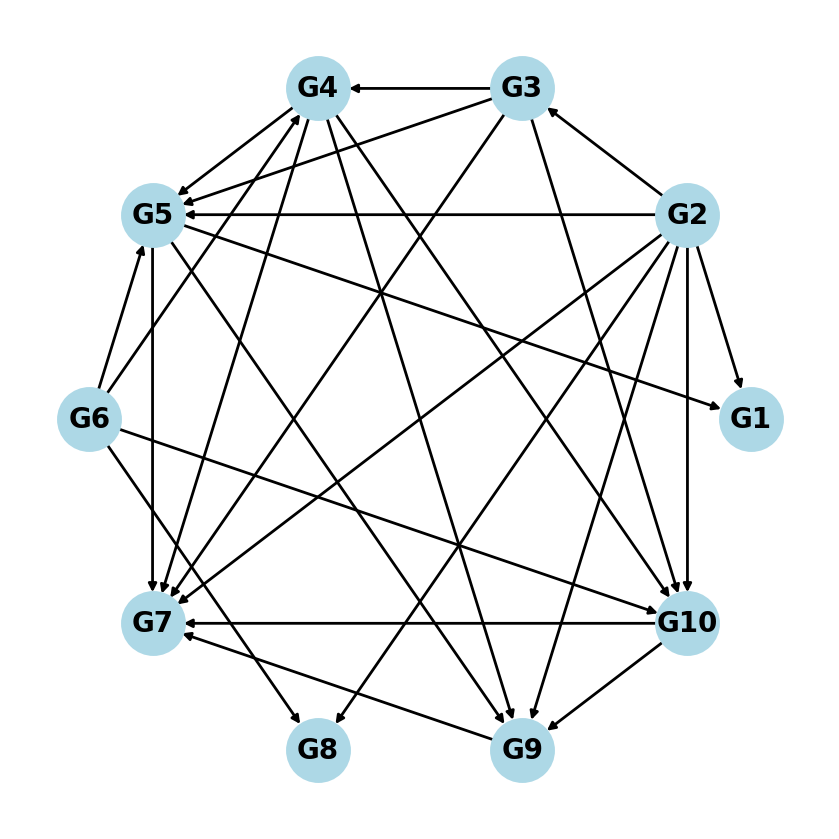

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout

graph=graphFromNotears(W_notears)

pos = nx.circular_layout(graph)
#pos=graphviz_layout(graph, prog='neato', root=None, args='')

plt.figure(3,figsize=(4,4))
nx.draw(graph, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_color="black", font_weight="bold", arrowsize=6)

plt.show()

In [ ]:
def find_v_structures(model):
  v_structures = []
  for node in model.nodes:
    parents = list(model.predecessors(node))



    for parent1 in parents:
      for parent2 in parents:
          if parent1!=parent2 and not model.has_edge(parent1, parent2) and not model.has_edge(parent2, parent1) and (parent2, node, parent1) not in v_structures:
            v_structures.append((parent1, node, parent2))

  return v_structures

def get_v_structure_edges(v_structures):
    v_edges=set()
    for i in v_structures:
      v_edges.add((i[0], i[1]))
      v_edges.add((i[2], i[1]))

    return v_edges


def convert_to_essential(graph):
  v_edges=get_v_structure_edges(find_v_structures(graph))
  for edge in graph.edges:
    if edge not in v_edges:
      graph.add_edge(edge[1], edge[0])

def show_graph(graph):

  #pos=graphviz_layout(graph, prog='neato', root=None, args='')
  #nx.draw(graph, pos, with_labels=True, node_size=250, node_color="red", font_size=10, font_color="black", font_weight="bold", arrowsize=10)

  pos = nx.circular_layout(graph)
  #pos=graphviz_layout(graph, prog='neato', root=None, args='')

  plt.figure(3,figsize=(4,4))
  nx.draw(graph, pos, with_labels=True, node_size=500, node_color="lightcoral", font_size=10, font_color="black", font_weight="bold", arrowsize=6)
  plt.show()

In [ ]:
v_structures=find_v_structures(graph)
print(v_structures)
v_edges=get_v_structure_edges(v_structures)

[('G3', 'G4', 'G6'), ('G2', 'G5', 'G4'), ('G2', 'G5', 'G6'), ('G3', 'G5', 'G6'), ('G2', 'G7', 'G4'), ('G3', 'G7', 'G9'), ('G5', 'G7', 'G10'), ('G2', 'G8', 'G6'), ('G2', 'G9', 'G4'), ('G5', 'G9', 'G10'), ('G2', 'G10', 'G4'), ('G2', 'G10', 'G6'), ('G3', 'G10', 'G6')]


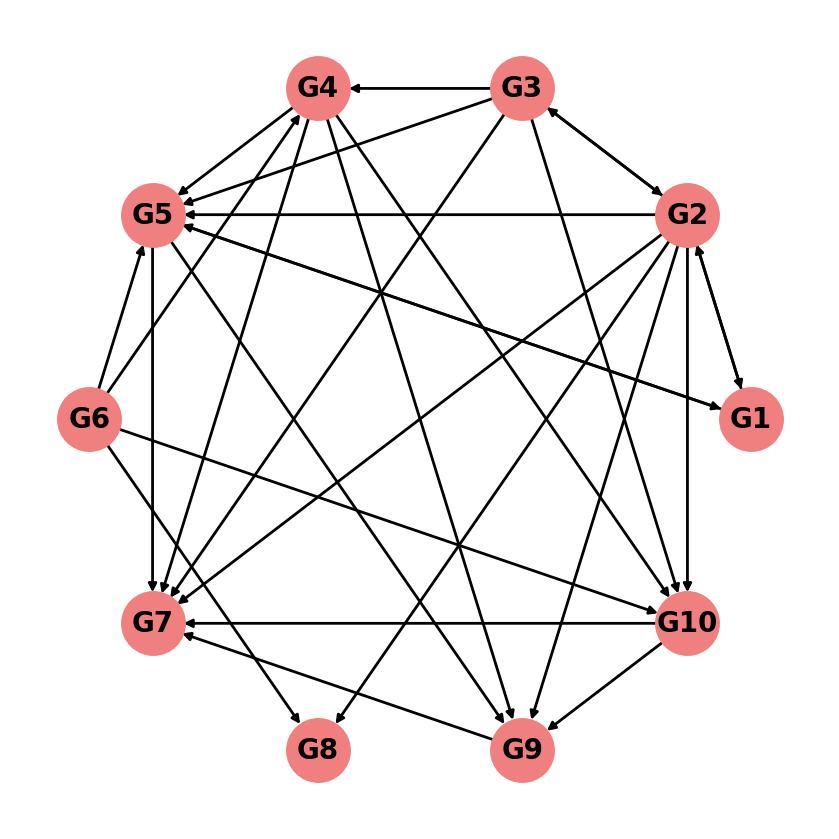

In [ ]:

convert_to_essential(graph)


show_graph(graph)


Aktív tanulás

In [ ]:
%pylab inline
from scipy.stats import beta

class EGreedy:
  def __init__(self,K,e):
    self.X = [] # eddigi jutalmak
    self.A = [] # melyik kart húztuk
    self.K = K  # karok száma

    self.e = e
    self.y = np.zeros(K)
    self.n = np.ones(K)
    self.Average= []
    self.regrets = []
    self.sum_regrets=[]

  # Kötelező: melyik legyen a következő kar
  def get_arm(self):
    if np.random.rand() < self.e:
      self.arm = np.random.choice(self.K)
    else:
      self.arm = np.argmax(self.y / self.n)
    return self.arm

  # Kötelező: az ágens állapotának frissítése
  def update(self,reward, real_rewards):
    self.A += [self.arm]
    self.X += [reward]
    self.y[self.arm] += reward
    self.Average += [np.sum(self.X)/len(self.A)]
    self.n[self.arm] += 1

    print(self.arm)
    print(reward)
    print(self.y/self.n)
    self.regrets+= [max(real_rewards.values())-reward]
    self.sum_regrets+= [np.sum(self.regrets)]

  def plot_regrets(self):
      pulls = np.arange(len(self.A)) + 1
      plt.plot(pulls, self.sum_regrets, label=f"GreedyEpsilon")

class ThompsonSampling:
  def __init__(self,K):
    self.X = [] # eddigi jutalmak
    self.A = [] # melyik kart húztuk
    self.K = K  # karok száma
    self.Average=[]


    self.alfa = np.empty(shape=(K,K*(K-1)))
    self.alfa.fill(1)
    self.regrets=[]
    self.sum_regrets=[]


  # Kötelező: melyik legyen a következő kar

  def get_arm(self):
    maxreward_karonkent=[]
    for i in self.alfa:
      minta=np.random.dirichlet(i)
      reward=np.argmax(minta)
      maxreward_karonkent.append(reward)

    self.arm=np.argmax(maxreward_karonkent)
    return self.arm



  # Kötelező: az ágens állapotának frissítése
  def update(self,reward, real_rewards):
    self.A += [self.arm]
    self.X += [reward]
    self.Average += [np.sum(self.X)/len(self.A)]
    self.alfa[self.arm][reward]+=1


    self.regrets+= [max(real_rewards.values())-reward]
    self.sum_regrets+= [np.sum(self.regrets)]

  def plot_regrets(self):
      pulls = np.arange(len(self.A)) + 1
      plt.plot(pulls, self.sum_regrets, label=f"ThompsonSampling")




def getReward(arm):
  key="G"+str(arm+1)
  data=knockout_dict[key]
  mintaindex=np.random.choice(range(len(data)), 4)
  minta=data[mintaindex]

  knockout_matrix = linear.notears_linear(minta, lambda1=0, loss_type='l2')
  knockout_graph=graphFromNotears(knockout_matrix)

  #show_graph(knockout_graph)
  v_edges=get_v_structure_edges(find_v_structures(knockout_graph))
  #convert_to_essential(knockout_graph)
  #show_graph(knockout_graph)
  return len(v_edges)


def simulate(agent, real_rewards, T=10):
  for t in range(T):
    arm    = agent.get_arm()
    reward = getReward(arm)
    agent.update(reward, real_rewards)

def scatterpl(agent, real_rewards, nsim):
  simulate(agent, real_rewards, nsim)
  pulls=np.arange(len(agent.A)) + 1
  plt.figure(figsize=(4, 3))
  plt.yticks(np.arange(agent.K))
  values=np.array(agent.A)+1
  plt.scatter(pulls, agent.A)

  plt.show()




Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['beta']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Calculate real reward for regrets:

In [ ]:
real_rewards={}
for gene in knockout_dict:
  data=knockout_dict[gene]
  knockout_matrix = linear.notears_linear(data, lambda1=0, loss_type='l2')
  knockout_graph=graphFromNotears(knockout_matrix)
  print(gene)


  v_edges=get_v_structure_edges(find_v_structures(knockout_graph))
  #convert_to_essential(knockout_graph)
  #show_graph(knockout_graph)
  real_rewards[gene] = len(v_edges)
print(real_rewards)

G1
G2
G3
G4
G5
G6
G7
G8
G9
G10
{'G1': 13, 'G2': 7, 'G3': 13, 'G4': 13, 'G5': 9, 'G6': 21, 'G7': 21, 'G8': 19, 'G9': 21, 'G10': 21}


0
8
[4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
5
[4.33333333 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
0
7
[5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
0
[4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
4
[4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
0
[3.42857143 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
0
2
[3.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
0
12
[4.22222222 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
6
2
[4.22222222 0.         0.         0.         0.         0.
 1.         0.         0.         0.        ]
0
0
[3.8 0.  0.  0.  0.  0.  1.  0.  0.  0. ]
8
5
[3.8 0.  0.  0.  0.  0.  1.  0.  2.5 0. ]
0
0
[3.45454545 0.         0.         0.         0.         0.
 1.         0.         2.5        0.        ]
8
7
[3.45454545 0.         0.         0.         0.         0.
 1.         0.         4.         0.        ]
8
6
[3.45454545 0.         0.         0.         0.  

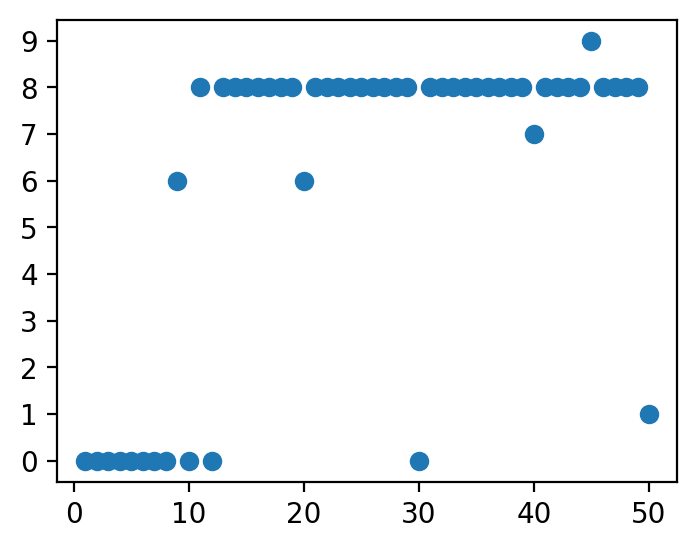

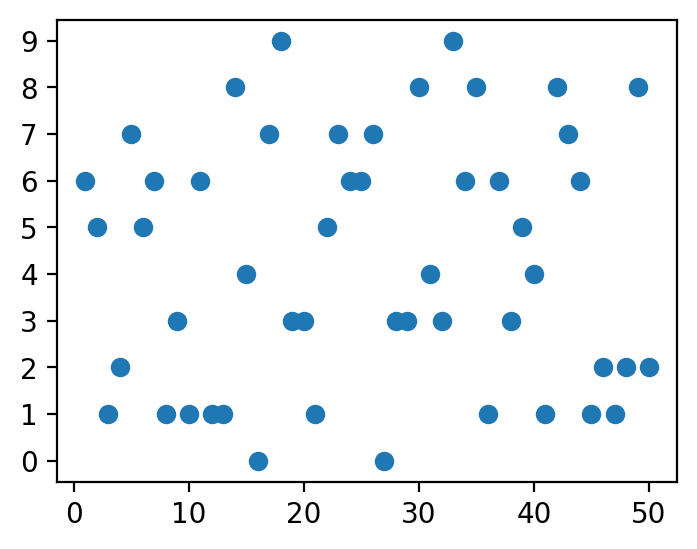

8
90


In [ ]:
moho=EGreedy(W_notears.shape[0], 0.2)
scatterpl(moho,real_rewards, 50)
tomzon=ThompsonSampling(W_notears.shape[0])
scatterpl(tomzon, real_rewards, 50)

print(np.argmax(moho.y))
print(np.argmax(tomzon.alfa))


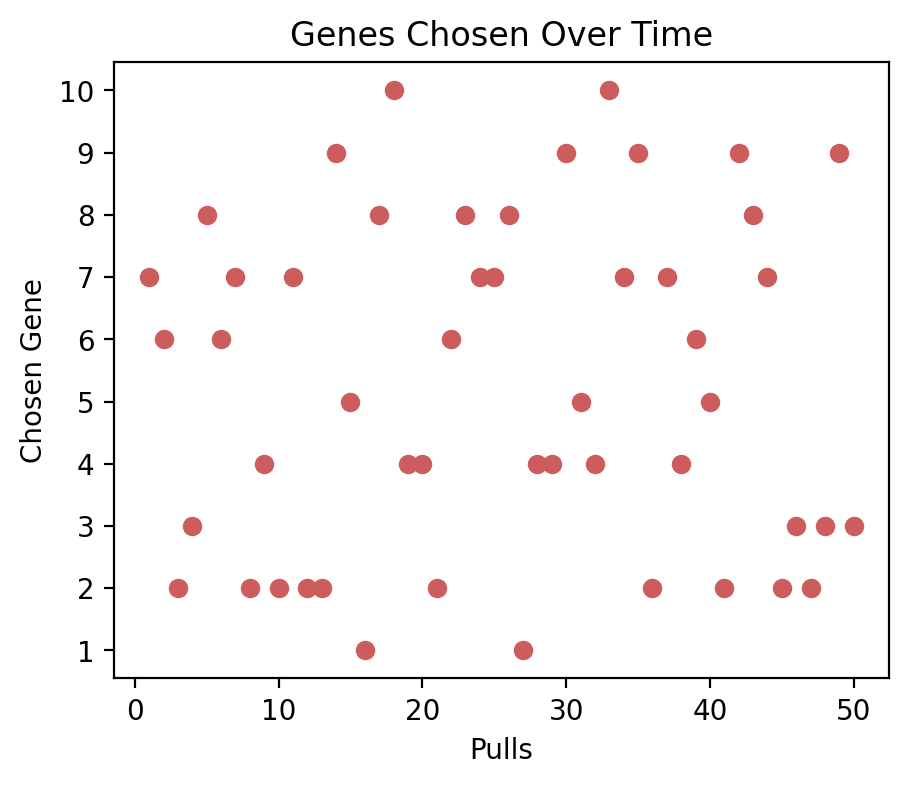

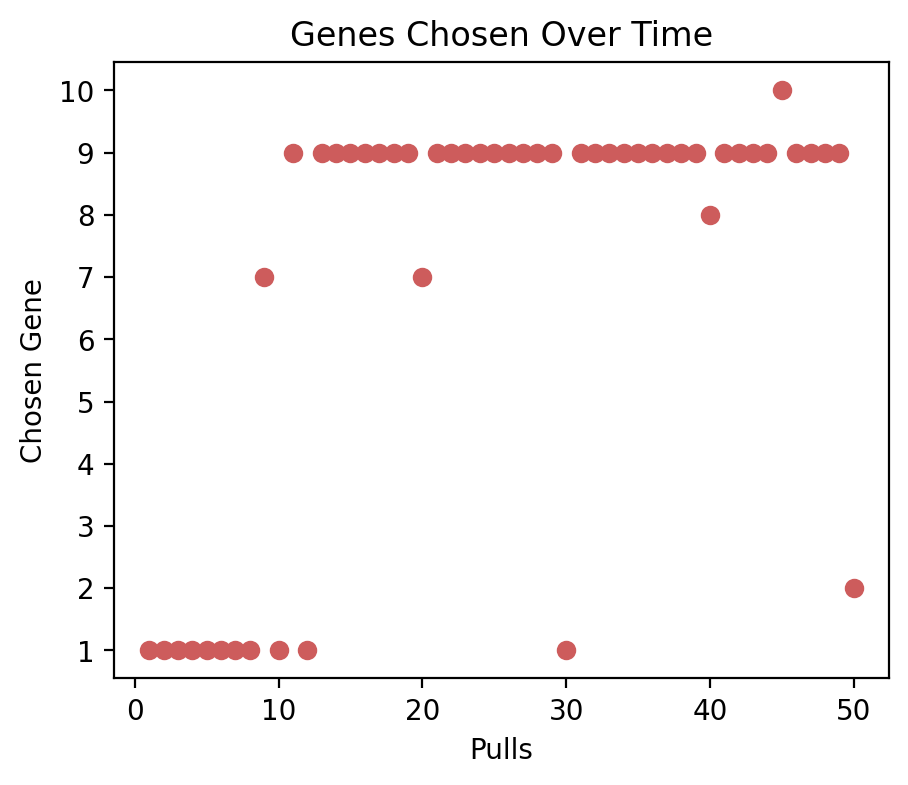

In [ ]:
def onlypl(agent):
  pulls=np.arange(len(agent.A)) + 1
  plt.figure(figsize=(5, 4))
  plt.yticks(np.arange(agent.K)+1)
  values=np.array(agent.A)+1
  plt.scatter(pulls, values, c="indianred")
  plt.xlabel('Pulls')
  plt.ylabel('Chosen Gene')
  plt.title('Genes Chosen Over Time')
  plt.show()

onlypl(tomzon)
onlypl(moho)

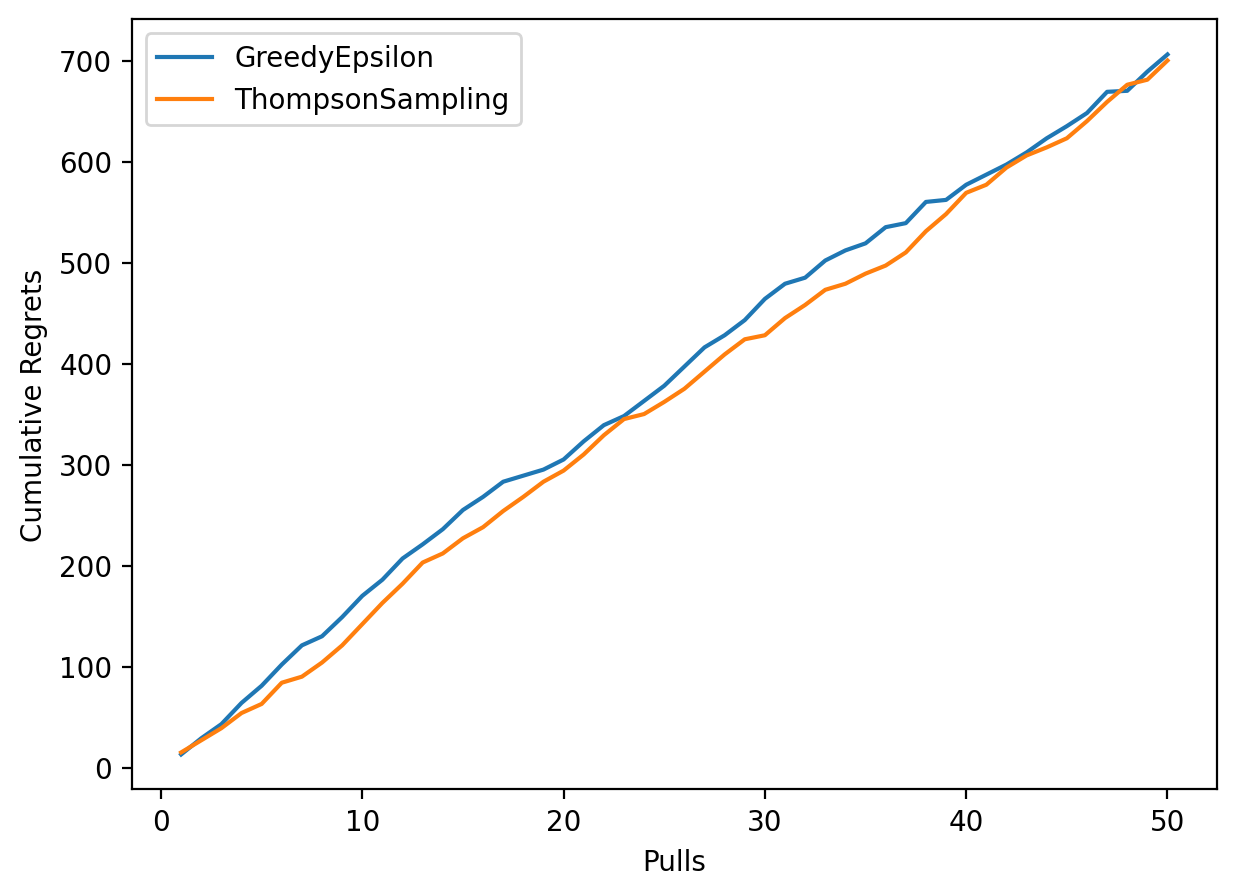

In [ ]:
"""
def plotatlag(agent):
  pulls=np.arange(len(agent.A))+1
  plt.figure(figsize=(4, 3))
  scatter(pulls, agent.sum_regrets)
"""

def plotatlag(*agents):
  plt.figure(figsize=(7, 5))
  for agent in agents:
      agent.plot_regrets()

  plt.xlabel("Pulls")
  plt.ylabel("Cumulative Regrets")
  plt.legend()
  plt.show()

plotatlag(moho, tomzon)




In [ ]:
maxperkar=[]
for i in tomzon.alfa:
  maxperkar.append(np.argmax(i))
  print(np.argmax(i))
print("G"+str(np.argmax(maxperkar)+1))
print("G"+str(np.argmax(moho.y/moho.n)+1))
print(real_rewards)

0
6
2
2
4
17
0
7
6
13
G6
G7
{'G1': 13, 'G2': 7, 'G3': 13, 'G4': 13, 'G5': 9, 'G6': 21, 'G7': 21, 'G8': 19, 'G9': 21, 'G10': 21}
